In [1]:
from astropy.table import Table, vstack, Column
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ks_2samp
import astropy.units as u

In [2]:
grupos = Table.read('sfr_decals_4.csv', format='ascii')
#control = Table.read('Control_Sample_1270.csv', format='ascii')
grupos.rename_column('logSFR_NUV', 'log_SFR')

In [3]:
H_0 = 67.4 #km/s/Mpc
c = 300000
M_solar_z = 4.5
M_solar_r = 4.65

#control['Distance (Mpc)'] = (control['z']*c)/H_0
#control['M_z'] = control['mag_z'] - 5*np.log10(control['Distance (Mpc)']*1000000) + 5 + 1.211*control['ebv']
#control['M_i'] = control['mag_i'] - 5*np.log10(control['Distance (Mpc)']*1000000) + 5 + 1.592*control['ebv']
#control['M_r'] = control['mag_r'] - 5*np.log10(control['Distance (Mpc)']*1000000) + 5 + 2.165*control['ebv']

#control['Li/Lsun'] = (4.53 - control['M_i'])/2.5
#control['Lr/Lsun'] = (M_solar_r - control['M_r'])/2.5
#control['Lz/Lsun'] = (M_solar_z - control['M_z'])/2.5

#control['stellar_mass_phot'] = -1.129 + 0.791*(control['mag_g']-control['mag_z']) + control['Lz/Lsun']
#control['stellar_mass_phot_r'] = -0.84 + 1.654*(control['mag_g']-control['mag_r']) + control['Lr/Lsun']
#control['stellar_mass_phot_i'] = (1.15 + 0.7*(control['mag_g'] - control['mag_i']) - 0.4*control['M_i'])

grupos['Distance (Mpc)'] = (grupos['zmemb']*c)/H_0
grupos['M_i'] = grupos['mag_i'] - 5*np.log10(grupos['Distance (Mpc)']*1000000) + 5 + 1.592*grupos['ebv']
grupos['stellar_mass_phot_i'] = (1.15 + 0.7*(grupos['mag_g'] - grupos['mag_i']) - 0.4*grupos['M_i'])
grupos

Group,Gal,zmemb,ra,dec,log_SFR,RE_g,n_g,RE_r,n_r,RE_i,n_i,RE_z,n_z,e_RE_g,e_n_g,e_RE_r,e_n_r,e_RE_i,e_n_i,e_RE_z,e_n_z,mag_g,mag_r,mag_i,mag_z,ebv,Distance (Mpc),M_i,stellar_mass_phot_i
int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
3,2,0.041719,2.837759217243158,-53.98101274211389,-0.17123263914445275,7.9612,0.7598,7.7652,0.8373,7.5781,0.9113,7.3757,0.9913,0.0126,0.0034,0.0083,0.0019,0.0122,0.0031,0.0204,0.0056,18.144655,17.64211,17.369955,17.241,0.013003452,185.6928783382789,-18.953319744770905,9.273617897908363
3,3,0.041719,2.842623280146343,-53.953910753132,-0.18691263914445244,36.266,0.9882,39.4389,1.5277,42.4663,2.0424,45.7435,2.5997,0.0217,0.0009,0.0252,0.001,0.0458,0.0017,0.0716,0.0027,18.939981,18.655025,18.444674,18.396204,0.013347207,185.6928783382789,-17.878053486810906,8.647936294724364
3,1,0.041719,2.834674521202194,-53.95652455274381,-0.5272326391444544,12.9987,0.6455,12.6179,0.8063,12.2546,0.9598,11.8613,1.1259,0.0366,0.0055,0.0328,0.0043,0.0548,0.0083,0.0866,0.0138,19.37119,18.964146,18.81202,18.714947,0.013247969,185.6928783382789,-17.510865473706904,8.545765189482761
3,4,0.041719,2.852407391719842,-53.9310223008958,0.7400473608555451,6.0261,1.2663,6.2935,1.2493,6.5486,1.2331,6.8247,1.2155,0.0303,0.0133,0.0223,0.0083,0.0355,0.0115,0.0579,0.0197,15.351681,14.765882,14.492288,14.339665,0.013674323,185.6928783382789,-21.829918718138902,10.48354258725556
10,4,0.051799,5.687584604767833,-20.58857817827894,0.8068623322841653,24.9659,0.8662,24.0913,1.0386,23.2569,1.2031,22.3536,1.3812,0.02,0.0012,0.0136,0.0008,0.0221,0.0014,0.0371,0.0024,16.156637,15.615921,15.386818,15.19269,0.021346333,230.55934718100886,-21.39311230679045,10.24611822271618
10,1,0.051799,5.653417994681938,-20.57092018426899,0.0803023322841625,nan,7.713,nan,5.1661,nan,2.736,nan,0.1055,nan,1.0338,nan,0.9901,nan,1.9078,nan,3.0885,18.44115,17.95422,17.66007,17.574535,0.021688515,230.55934718100886,-19.119315553046444,9.344482221218577
10,3,0.051799,5.674201525891037,-20.58429908579907,0.3485423322841612,5.1648,0.7873,4.7051,0.9068,4.2665,1.0208,3.7916,1.1443,0.0106,0.0055,0.0068,0.0037,0.0103,0.0075,0.0175,0.0128,17.86178,17.545397,17.452723,17.32738,0.021552328,230.55934718100886,-19.326879362750446,9.167091645100179
11,1,0.0931,7.791397378063242,-25.49810943981049,0.39091894304495156,12.2526,1.2669,13.3155,2.854,14.3296,4.3682,15.4274,6.0074,0.008,0.0016,0.0122,0.0026,0.0234,0.005,0.0365,0.0078,18.590342,18.2692,18.036205,17.969353,0.016303431,414.3916913946587,-20.024895133676427,9.547853953470572
11,2,0.0931,7.797374162347395,-25.49057113235629,1.1359589430449546,5.7992,1.3785,6.1961,1.357,6.5748,1.3365,6.9848,1.3143,0.0166,0.0071,0.0119,0.0043,0.0203,0.0062,0.0338,0.0108,16.17812,15.650825,15.322071,15.132059,0.016199168,414.3916913946587,-22.739195120372425,10.84491234814897


In [4]:
control = control[control['Gal'] != 218]
print(len(control), len(grupos))
control = control[(~np.isinf(control['stellar_mass_phot_i'])) & (~np.isnan(control['stellar_mass_phot_i']))]
grupos = grupos[grupos['n_i'] != 0.0]
control = (control[control['stellar_mass_phot_i']<14])
control = control[(control['stellar_mass']>0) & (control['stellar_mass_phot_i']>0)]
print(len(control), len(grupos))

1270 371
1268 371


In [107]:
control_masas = control[(control['stellar_mass_phot_i']>10)&(control['stellar_mass_phot_i']<11)]
# Seleccionar 10 índices aleatorios de las galaxias filtradas
indices_aleatorios = np.random.choice(len(control_masas), size=68, replace=False)
galaxias_a_eliminar = control_masas[indices_aleatorios]

# Obtener los índices en la tabla original correspondientes a las galaxias seleccionadas
indices_originales = np.isin(control, galaxias_a_eliminar)

# Eliminar las galaxias de la tabla original
control_filtrado = control[~indices_originales]



In [116]:
# Crear una columna de índices
#indices = list(range(1, len(control_filtrado)+1))

# Añadir la columna de índices a la tabla
#control_filtrado.add_column(Column(indices, name='index'))
control_filtrado
control_filtrado.write('Control_Sample_1200.csv', format='csv', overwrite=True)

In [4]:
control_filtrado = Table.read('Control_Sample_1200.csv', format='ascii')
control_filtrado

Group,Gal,ID,ra,dec,type,CHI2NU,XC_g,e_XC_g,YC_g,e_YC_g,RE_g,e_RE_g,MAG_g,e_MAG_g,n_g,e_n_g,AR_g,e_AR_g,PA_g,e_PA_g,XC_r,e_XC_r,YC_r,e_YC_r,RE_r,e_RE_r,MAG_r,e_MAG_r,n_r,e_n_r,AR_r,e_AR_r,PA_r,e_PA_r,XC_i,e_XC_i,YC_i,e_YC_i,RE_i,e_RE_i,MAG_i,e_MAG_i,n_i,e_n_i,AR_i,e_AR_i,PA_i,e_PA_i,XC_z,e_XC_z,YC_z,e_YC_z,RE_z,e_RE_z,MAG_z,e_MAG_z,n_z,e_n_z,AR_z,e_AR_z,PA_z,e_PA_z,brickid,brickname,objid,ebv,flux_g,flux_r,flux_i,flux_z,psfsize_g,psfsize_r,psfsize_i,psfsize_z,sersic,sersic_ivar,shape_r,shape_r_ivar,shape_e1,shape_e1_ivar,shape_e2,shape_e2_ivar,mag_g,mag_r,mag_i,mag_z,mag_w1,mag_w2,mag_w3,mag_w4,g_r,r_i,r_z,i_z,z,stellar_mass,error_stellar_mass,log_SFR,error_log_SFR,Distance (Mpc),M_i,stellar_mass_phot_i,index
int64,int64,int64,float64,float64,str3,float64,str10,float64,str10,float64,float64,float64,float64,float64,str9,str8,str8,str8,float64,float64,str10,float64,str10,float64,float64,float64,str9,str8,str9,str8,str8,str8,float64,float64,str10,float64,str10,float64,float64,float64,str9,str12,str9,str8,str8,str8,float64,float64,str10,float64,str10,float64,float64,float64,float64,float64,str9,str8,str8,str8,float64,float64,int64,str8,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64
2,2,4345,146.037899914,5.936883936,SER,0.518974579120454,[573.0000],0.0,[573.0000],0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[573.0000],0.0,[573.0000],0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[573.0000],0.0,[573.0000],0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[573.0000],0.0,[573.0000],0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,365471,--,4345,0.03810383,90.73341,135.2012,164.73248,175.39871,1.6321088,1.1554528,1.3240439,1.287701,0.95234656,52959.43,7.7095037,7430.0376,0.034991268,353575.5,-0.09275164,544142.7,17.605581,17.172548,16.958052,16.889935,17.767561,18.341188,--,--,0.433033,0.21449661,0.28261375,0.06811714,0.0101,8.07,0.053,-1.813,0.062,44.95548961424332,-16.24520036247493,8.101350444989974,1
3,3,446,204.012267575,-1.608630995,SER,0.89628124496353,342.6432,0.0272,344.4836,0.0216,28.7471,0.0726,17.1758,0.0024,0.8267,0.0032,0.7809,0.0010,75.6031,0.2677,342.6432,0.0272,344.4836,0.0216,28.445,0.0478,16.7448,0.0019,0.8934,0.0019,0.7809,0.0010,75.6031,0.2677,342.6432,0.0272,344.4836,0.0216,28.1567,0.067,16.5889,0.0023,0.9569,0.0028,0.7809,0.0010,75.6031,0.2677,342.6432,0.0272,344.4836,0.0216,27.8446,0.1115,16.4979,0.0041,1.0258,0.0050,0.7809,0.0010,75.6031,0.2677,322544,--,446,0.033790406,57.650288,86.54956,98.67497,111.3999,1.5149013,1.421732,1.2831888,1.2701312,1.1050656,82189.64,2.2962878,869999.6,0.044952676,1776487.1,-0.15680058,2693102.0,18.097996,17.656837,17.514482,17.382788,18.08396,18.969465,16.784136,--,0.4411583,0.14235497,0.27404976,0.1316948,0.0146,8.044,0.076,-1.269,0.103,64.98516320474776,-16.495794743491896,8.156777697396757,2
5,5,3209,125.743385329,24.864193396,SER,0.396124539832107,344.9315,0.0208,343.3506,0.0049,36.8885,0.0559,17.1433,0.0013,0.9171,0.0023,0.1976,0.0002,78.5132,0.0177,344.9315,0.0208,343.3506,0.0049,35.983,0.0413,16.6977,0.0013,0.9759,0.0015,0.1976,0.0002,78.5132,0.0177,344.9315,0.0208,343.3506,0.0049,35.1191,0.0629,16.5306,0.0018,1.0320,0.0026,0.1976,0.0002,78.5132,0.0177,344.9315,0.0208,343.3506,0.0049,34.184,0.1018,16.4441,0.0029,1.0927,0.0044,0.1976,0.0002,78.5132,0.0177,469217,--,3209,0.030500926,85.3396,93.5364,84.89223,89.02641,1.3353922,1.3477556,1.5884084,1.2457496,2.7116916,5983.596,2.1508393,65549.08,-0.1994719,435528.28,0.2200716,484509.88,17.672123,17.572548,17.67783,17.626204,18.362085,18.87445,--,14.922511,0.09957504,-0.10528183,-0.053655624,0.051626205,0.0182,7.745,0.126,-0.657,0.046,81.00890207715133,-16.816276256655083,7.872515602662033,3
7,7,6365,204.777262829,3.419248139,SER,0.53856088971423,344.1668,0.0082,344.3460,0.0103,17.0044,0

/home/seba/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/seba/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


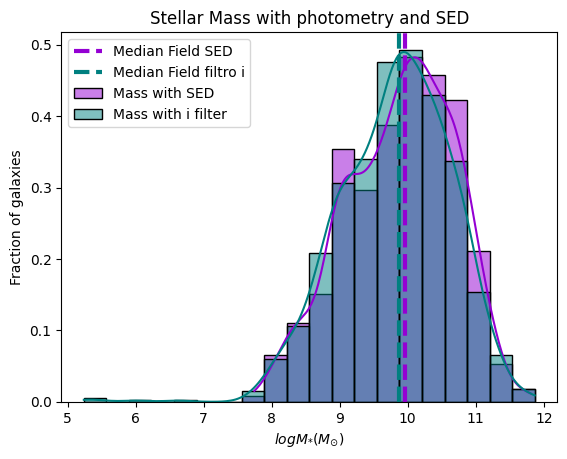

In [5]:
masas_control_filtrado_sed = control_filtrado['stellar_mass'][control_filtrado['stellar_mass']>0]
masas_control_filtrado_phot = control_filtrado['stellar_mass_phot_i'][control_filtrado['stellar_mass_phot_i']>0]

bin_edges = np.linspace(min(masas_control_filtrado_sed.min(), masas_control_filtrado_phot.min()), 
                        max(masas_control_filtrado_sed.max(), masas_control_filtrado_phot.max()), 
                        21)

sns.histplot(masas_control_filtrado_sed, kde=True, stat='density', alpha=0.5, bins=bin_edges, color='darkviolet', label='Mass with SED')
sns.histplot(masas_control_filtrado_phot, kde=True, stat='density', alpha=0.5, bins=bin_edges, color='teal', label='Mass with i filter')

# Calcular medianas
median_x = np.nanmedian(masas_control_filtrado_sed)
median_x_2 = np.nanmedian(masas_control_filtrado_phot)

# Añadir líneas de la mediana 
plt.axvline(median_x, color='darkviolet', linestyle='--', linewidth=3, label='Median Field SED')
plt.axvline(median_x_2, color='teal', linestyle='--', linewidth=3, label='Median Field filtro i')

# Etiquetas y título
plt.xlabel('$log M_{*}(M_{\odot})$')
plt.ylabel('Fraction of galaxies')
plt.title('Stellar Mass with photometry and SED')
plt.legend()
plt.show()

In [6]:
# Realizar la prueba KS entre las dos columnas
#statistic, p_value = 
ks_2samp(masas_control_filtrado_sed, masas_control_filtrado_phot)
#print(statistic, p_value)

KstestResult(statistic=0.0575, pvalue=0.03782090990671419, statistic_location=9.906999425513652, statistic_sign=-1)

In [ ]:
print(masas_control_phot[masas_control_phot==np.nan])
print(masas_control_sed, masas_control_phot)

Coeficiente de correlación: 0.9706835556615903


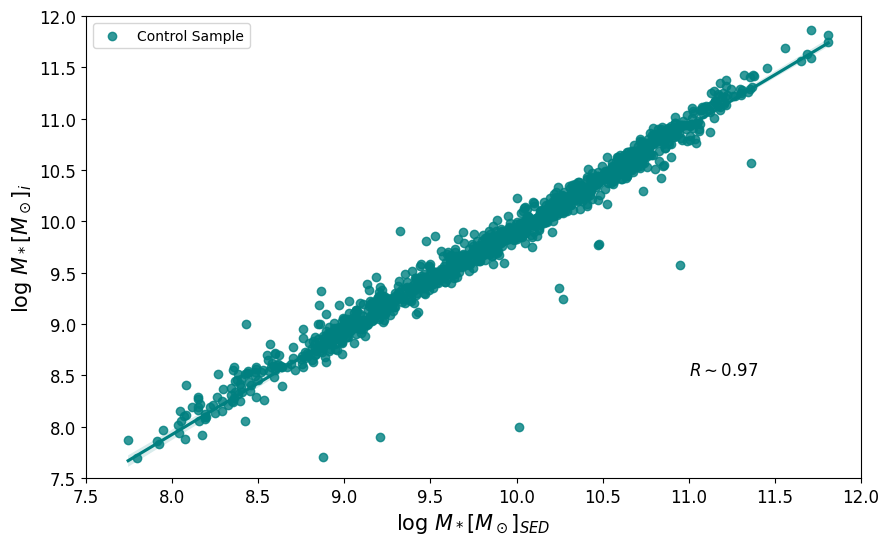

In [48]:
# Verificar y limpiar los datos
valid_indices = np.isfinite(masas_control_filtrado_phot) & np.isfinite(masas_control_filtrado_sed)
data1_clean = masas_control_filtrado_sed[valid_indices]
data2_clean = masas_control_filtrado_phot[valid_indices]

# Calcular el coeficiente de correlación solo si hay datos válidos
if len(data1_clean) > 0 and len(data2_clean) > 0:
    correlation_coefficient = np.corrcoef(data1_clean, data2_clean)[0, 1]
    print("Coeficiente de correlación:", correlation_coefficient)
else:
    print("No hay suficientes datos válidos para calcular el coeficiente de correlación.")

# Configurar la figura y el tamaño
plt.figure(figsize=(10, 6))

# Graficar la regresión lineal
sns.regplot(x=data1_clean, y=data2_clean, color='teal', label='Control Sample')
plt.annotate("$R \sim 0.97$", xy=(11, 8.5), xytext=(11, 8.5), fontsize=12, color='black')
#x_id = np.linspace(5, 13, 10)
#plt.plot(x_id, x_id, color='black')
# Configurar etiquetas de los ejes
plt.xticks(size=12)
plt.yticks(size=12)
plt.xlim(7.5, 12)
plt.ylim(7.5, 12)

plt.xlabel('log $M_*[M_\odot]_{SED}$', size=15)
plt.ylabel('log $M_*[M_\odot]_i$', size=15)
#plt.title('$log M_{*}$ with SED and color for Control Sample Galaxies', size=17)
plt.legend()
# Mostrar el gráfico
plt.show()

/home/seba/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/seba/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


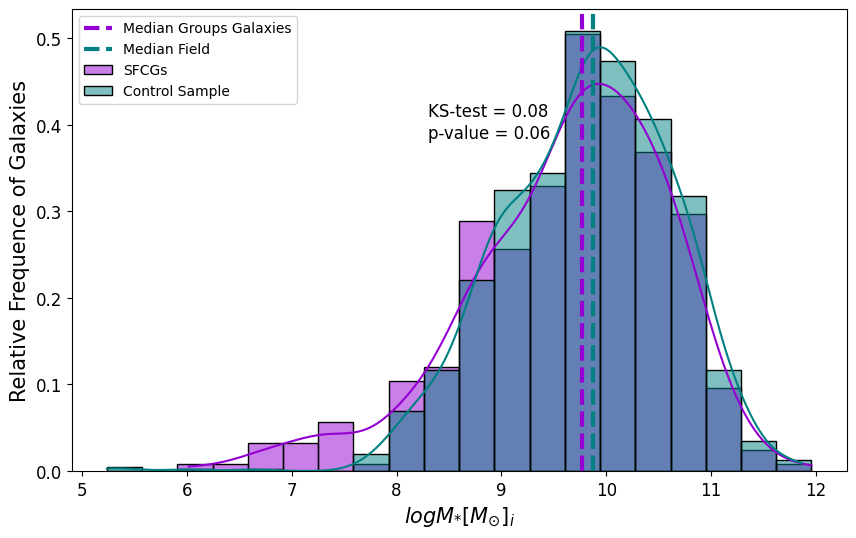

In [47]:
masas_control_filtrado_phot = control_filtrado['stellar_mass_phot_i'][control_filtrado['stellar_mass']>0]
masas_grupos = grupos['stellar_mass_phot_i']

bin_edges = np.linspace(min(masas_control_filtrado_phot.min(), masas_grupos.min()), 
                        max(masas_control_filtrado_phot.max(), masas_grupos.max()), 
                        21)
plt.figure(figsize=(10, 6))
sns.histplot(masas_grupos, kde=True, stat='density', alpha=0.5, bins=bin_edges, color='darkviolet', label='SFCGs')
sns.histplot(masas_control_filtrado_phot, kde=True, stat='density', alpha=0.5, bins=bin_edges, color='teal', label='Control Sample')

# Calcular medianas
median_x = np.nanmedian(masas_grupos)
median_x_2 = np.nanmedian(masas_control_filtrado_phot)

# Añadir líneas de la mediana 
plt.axvline(median_x, color='darkviolet', linestyle='--', linewidth=3, label='Median Groups Galaxies')
plt.axvline(median_x_2, color='teal', linestyle='--', linewidth=3, label='Median Field')

plt.xticks(size=12)
plt.yticks(size=12)
plt.annotate("KS-test = 0.08", xy=(8.3, 0.41), xytext=(8.3, 0.41), fontsize=12, color='black')
plt.annotate("p-value = 0.06", xy=(8.3, 0.385), xytext=(8.3, 0.385), fontsize=12, color='black')


# Etiquetas y título
plt.xlabel('$log M_{*}[M_{\odot}]_{i}$', size=15)
plt.ylabel('Relative Frequence of Galaxies', size=15)
#plt.title('Stellar Mass for SFCGs and Control Sample Galaxies', size=17)
plt.legend()
plt.show()

In [44]:
ks_2samp(masas_grupos, masas_control_filtrado_phot)

KstestResult(statistic=0.07832884097035041, pvalue=0.05795009458749454, statistic_location=8.915380419747008, statistic_sign=1)

/home/seba/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/seba/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/seba/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


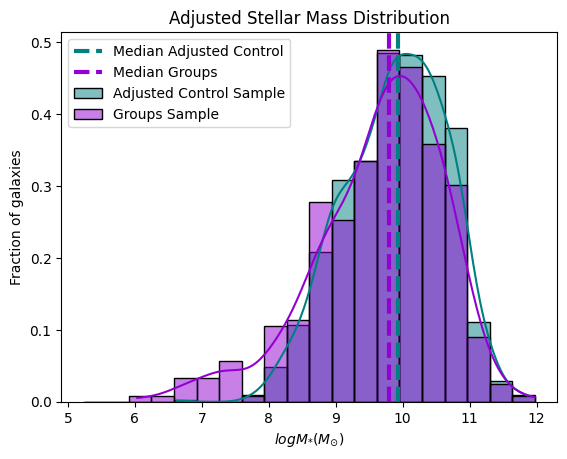

In [7]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Definir las distribuciones de masa
masas_control_phot = control['stellar_mass_phot_i'][control['stellar_mass'] > 0]  # Muestra mayor
masas_grupos = grupos['stellar_mass_phot_i']  # Muestra menor

# Definir los bin edges para ambos conjuntos de datos
bin_edges = np.linspace(min(masas_control_phot.min(), masas_grupos.min()), 
                        max(masas_control_phot.max(), masas_grupos.max()), 
                        21)

# Histograma para la muestra menor (grupos)
grupos_hist, _ = np.histogram(masas_grupos, bins=bin_edges)
# Histograma para la muestra mayor (control)
control_hist, _ = np.histogram(masas_control_phot, bins=bin_edges)

# Fracción de galaxias en cada bin para la muestra menor (grupos)
fraccion_grupos = grupos_hist / len(masas_grupos)

# Fracción de galaxias en cada bin para la muestra mayor (control)
fraccion_control = control_hist / len(masas_control_phot)

# Ahora ajustamos la muestra mayor (control)
masas_control_adjusted = []

# Recorrer los bins y ajustar la muestra mayor
for i in range(len(bin_edges) - 1):
    # Seleccionar las galaxias en este bin
    galaxias_en_bin = masas_control_phot[(masas_control_phot >= bin_edges[i]) & (masas_control_phot < bin_edges[i+1])]
    
    # Calcular cuántas galaxias debe tener el bin ajustado
    num_galaxias_deseado = int(fraccion_grupos[i] * len(masas_control_phot))  # Mismo porcentaje que la muestra menor
    
    # Si el número actual de galaxias es mayor que el necesario, reducir
    if len(galaxias_en_bin) > num_galaxias_deseado:
        # Seleccionar aleatoriamente el número deseado de galaxias
        galaxias_reducidas = np.random.choice(galaxias_en_bin, num_galaxias_deseado, replace=False)
        masas_control_adjusted.extend(galaxias_reducidas)
    else:
        # Si ya tiene menos o igual, conservar todas
        masas_control_adjusted.extend(galaxias_en_bin)

# Convertir la lista ajustada a un array
masas_control_adjusted = np.array(masas_control_adjusted)

# Graficar la distribución ajustada
sns.histplot(masas_control_adjusted, kde=True, stat='density', alpha=0.5, bins=bin_edges, color='teal', label='Adjusted Control Sample')
sns.histplot(masas_grupos, kde=True, stat='density', alpha=0.5, bins=bin_edges, color='darkviolet', label='Groups Sample')

# Calcular medianas
median_x_adjusted = np.nanmedian(masas_control_adjusted)
median_x_grupos = np.nanmedian(masas_grupos)

# Añadir líneas de la mediana
plt.axvline(median_x_adjusted, color='teal', linestyle='--', linewidth=3, label='Median Adjusted Control')
plt.axvline(median_x_grupos, color='darkviolet', linestyle='--', linewidth=3, label='Median Groups')

# Etiquetas y título
plt.xlabel('$log M_{*}(M_{\odot})$')
plt.ylabel('Fraction of galaxies')
plt.title('Adjusted Stellar Mass Distribution')
plt.legend()
plt.show()


In [8]:
print(len(masas_control_adjusted))
ks_2samp(masas_control_adjusted, masas_grupos)

1225


KstestResult(statistic=0.09183673469387756, pvalue=0.0163058595223316, statistic_location=8.929391661030888, statistic_sign=-1)

/home/seba/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/seba/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/seba/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


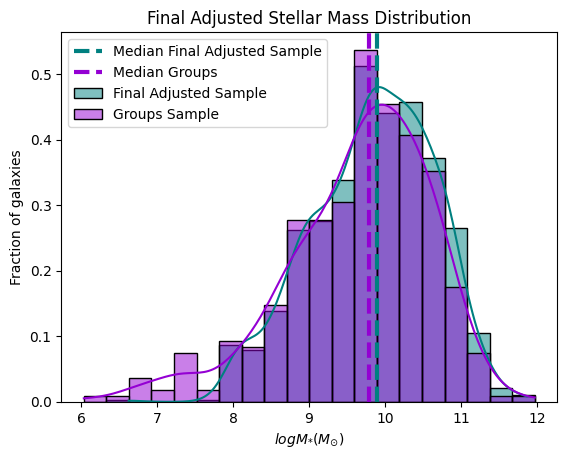

In [9]:
otro_set = Table.read('/home/seba/Documents/CG/isolated_sample_dr4.csv', format='ascii')
# Definir las distribuciones de masa y las ajustadas
masas_control_adjusted = np.array(masas_control_adjusted)  # Set ajustado actual
masas_grupos = grupos['stellar_mass_phot_i']  # Muestra menor
masas_extra = otro_set['stellar_mass']  # Set de datos más grande con galaxias adicionales

# Definir los bin edges para los histogramas
bin_edges = np.linspace(min(masas_control_adjusted.min(), masas_grupos.min()), 
                        max(masas_control_adjusted.max(), masas_grupos.max()), 
                        21)

# Histograma de la muestra menor (grupos)
grupos_hist, _ = np.histogram(masas_grupos, bins=bin_edges)
# Histograma de la muestra ajustada actual (control ajustado)
adjusted_hist, _ = np.histogram(masas_control_adjusted, bins=bin_edges)

# Fracción de galaxias en cada bin para la muestra menor (grupos)
fraccion_grupos = grupos_hist / len(masas_grupos)

# Fracción de galaxias en cada bin para la muestra ajustada actual
fraccion_adjusted = adjusted_hist / len(masas_control_adjusted)

# Verificar cuántas galaxias faltan en cada bin
galaxias_faltantes = np.maximum(0, fraccion_grupos * len(masas_control_adjusted) - adjusted_hist)

# Añadir galaxias faltantes desde el set más grande (sobretodo para masas bajas)
masas_final_adjusted = list(masas_control_adjusted)

for i in range(len(bin_edges) - 1):
    if galaxias_faltantes[i] > 0:
        # Seleccionar galaxias adicionales del set más grande en este bin
        galaxias_en_bin = masas_extra[(masas_extra >= bin_edges[i]) & (masas_extra < bin_edges[i+1])]
        
        # Si hay suficientes galaxias en este bin
        if len(galaxias_en_bin) >= galaxias_faltantes[i]:
            # Seleccionar aleatoriamente las galaxias necesarias
            galaxias_a_agregar = np.random.choice(galaxias_en_bin, int(galaxias_faltantes[i]), replace=False)
            masas_final_adjusted.extend(galaxias_a_agregar)
        else:
            # Si no hay suficientes galaxias, agregar todas las que haya
            masas_final_adjusted.extend(galaxias_en_bin)

# Convertir la lista final ajustada a un array
masas_final_adjusted = np.array(masas_final_adjusted)

# Graficar la distribución ajustada final
sns.histplot(masas_final_adjusted, kde=True, stat='density', alpha=0.5, bins=bin_edges, color='teal', label='Final Adjusted Sample')
sns.histplot(masas_grupos, kde=True, stat='density', alpha=0.5, bins=bin_edges, color='darkviolet', label='Groups Sample')

# Calcular medianas
median_x_final_adjusted = np.nanmedian(masas_final_adjusted)
median_x_grupos = np.nanmedian(masas_grupos)

# Añadir líneas de la mediana
plt.axvline(median_x_final_adjusted, color='teal', linestyle='--', linewidth=3, label='Median Final Adjusted Sample')
plt.axvline(median_x_grupos, color='darkviolet', linestyle='--', linewidth=3, label='Median Groups')

# Etiquetas y título
plt.xlabel('$log M_{*}(M_{\odot})$')
plt.ylabel('Fraction of galaxies')
plt.title('Final Adjusted Stellar Mass Distribution')
plt.legend()
plt.show()


In [10]:
print(len(masas_final_adjusted))
ks_2samp(masas_final_adjusted, masas_grupos)

1284


KstestResult(statistic=0.07106055937831639, pvalue=0.10778093297604924, statistic_location=9.3037357871972, statistic_sign=-1)

In [14]:
# Crear la tabla con las galaxias seleccionadas en 'masas_control_adjusted'
indices_control_adjusted = np.isin(control['stellar_mass_phot_i'], masas_control_adjusted)
tabla_control_adjusted = control[indices_control_adjusted]

# Mostrar la tabla de galaxias ajustadas (masas_control_adjusted)
print("Galaxias en la muestra ajustada (control):")
print(tabla_control_adjusted)

# Crear la tabla con las galaxias añadidas al final provenientes de 'otro_set'
#indices_extra_final_adjusted = np.isin(otro_set['stellar_mass'], masas_final_adjusted)
#tabla_extra_final_adjusted = otro_set[indices_extra_final_adjusted]

# Mostrar la tabla de galaxias añadidas desde el set más grande
#print("Galaxias añadidas desde otro_set:")
#tabla_control_adjusted.write('galaxias_1225.csv', format='csv')


Galaxias en la muestra ajustada (control):
Group Gal    ID  ... stellar_mass_phot  stellar_mass_phot_r stellar_mass_phot_i
----- ---- ----- ... ------------------ ------------------- -------------------
    2    2  4345 ...  7.768209954681971   8.139784929153974   8.101350444989974
    3    3   446 ...  7.892874683271156   8.283308122341557   8.156777697396757
    5    5  3209 ...   7.45913117278443   7.946329540422828   7.872515602662033
    7    7  6365 ...  7.748984440725232   8.169053897695635   8.057582953700834
    8    8  6935 ...  7.640987415918846   8.062711999262048   7.942552505593651
    9    9  8558 ...  7.483063980318587   7.940107382117782  7.8277973739773845
   10   10  1131 ...  7.762938471775526   8.143215976935526   8.269379631015525
   11   11 14769 ...  7.772047877846279   8.171485513926278   8.124458754466279
   13   13  1363 ...   8.29904002969528    8.67170718164568   8.577610637140882
   14   14  5129 ...  7.813786247355922   8.216464556011122    8.117609741598

In [15]:
#tabla_coincidencias = Table.read('galaxias_extra.csv')
#radii_column = Column([5] * len(tabla_control_adjusted), name='Radii')

# Añadir la columna a la tabla
#tabla_control_adjusted.add_column(radii_column)

# Crear una columna de índices
indices = list(range(1, len(tabla_control_adjusted)+1))

# Añadir la columna de índices a la tabla
tabla_control_adjusted.add_column(Column(indices, name='index'))
#control_sample
#control_sample.write('control_sample_decals.csv', format='csv')
#tabla_coincidencias_decals = tabla_coincidencias['index', 'ra', 'dec', 'Radii']
#tabla_coincidencias_decals
# Guardar la tabla en un archivo CSV o el formato que prefieras
tabla_control_adjusted
tabla_control_adjusted.write('/home/seba/Documents/MorphoLS/Catalog/galaxias_1225.csv', format='csv', overwrite=True)